<a href="https://colab.research.google.com/github/BelandyG/Food-Sales-Predictions/blob/main/Sales_Predictionss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Predictions

Belandy Gard

# Loading Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
          
filename = ('/content/sales_predictions.csv')
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df2 = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Cleaning (Part 2)

In [5]:
#1) How many rows and columns?
df.shape

(8523, 12)

In [6]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in this dataset.")

There are 8523 rows and 12 columns in this dataset.


In [7]:
#2) What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
#3) Are there duplicates? If so, drop any duplicates.
df.duplicated().sum()

0

In [9]:
#4) I will Identify missing values.
#There are 1463 missing valuses in Item_Weight
#There are 2410 missing values in Outlet_Size
sum_missing = df.isna().sum()
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
missing_Item_Weight = sum_missing.loc['Item_Weight']
percent_missing_Item_Weight = (((missing_Item_Weight) / (df.shape[0])*100)).round(2)
print(f"There are {missing_Item_Weight} missing values in the Item_Weight column, representing {percent_missing_Item_Weight}% of values missing.")

There are 1463 missing values in the Item_Weight column, representing 17.17% of values missing.


In [11]:
# I will calculate percentage of missing values for Outlet_Size
missing_Outlet_Size = sum_missing.loc['Outlet_Size']
percent_missing_Outlet_Size = (((missing_Outlet_Size) / (df.shape[0])*100)).round(2)
print(f"There are {missing_Outlet_Size} missing values in the Item_Weight column, representing {percent_missing_Outlet_Size}% of values missing.")

There are 2410 missing values in the Item_Weight column, representing 28.28% of values missing.


In [12]:
#5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

# I will not drop the missing values. Instead I will look to impute the missing values.

# loop through all the rows in the df
for index in df.index:

  # create a filter for only items whose Item_Identifier matches that of the current row
  item_identifier_filter = df['Item_Identifier'] == df.loc[index, 'Item_Identifier']

  # calculate the mean item weight of the items in the filter
  mean_item_weight = df.loc[item_identifier_filter, 'Item_Weight'].mean()

  # assign the mean_item_weight to the Item_Weight column in this row
  df.loc[index, 'Item_Weight'] = mean_item_weight


In [13]:
# I will check if all Item_Weights have been imputed
df.isna().sum()['Item_Weight']

4

In [14]:
# I will check the 4 items left that are missing their Item_Weight
filtered_df = df[df['Item_Weight'].isna()]
filtered_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [15]:
# I confirm that these Item_Identifiers each only appeared in the dataset once
for index, row in filtered_df.iterrows():
  identifier = row['Item_Identifier']
  number = df['Item_Identifier'].value_counts()[identifier]
  print(f"The Item_Idenfier {identifier} appears in the dataset {number} time(s).")

The Item_Idenfier FDN52 appears in the dataset 1 time(s).
The Item_Idenfier FDK57 appears in the dataset 1 time(s).
The Item_Idenfier FDE52 appears in the dataset 1 time(s).
The Item_Idenfier FDQ60 appears in the dataset 1 time(s).


In [16]:
# since they are all unique items, their Item_Weight is unknown
# set their Item_Weights to the average Item_Weight

for index, row in filtered_df.iterrows():
  df.loc[index, 'Item_Weight'] = df['Item_Weight'].mean()

In [17]:
# check if all Item_Weights have been imputed
df.isna().sum()['Item_Weight']

0

In [18]:
# loop through all the rows in the df
for index in df.index:

  # create a filter for only items whose Item_Identifier matches that of the current row
  outlet_identifier_filter = df['Outlet_Identifier'] == df.loc[index, 'Outlet_Identifier']

  # calculate the mean item weight of the items in the filter
  outlet_size = df.loc[outlet_identifier_filter, 'Outlet_Size'].min()

  # assign the mean_item_weight to the Item_Weight column in this row
  df.loc[index, 'Outlet_Size'] = outlet_size



In [19]:
# check if all Outlet_Sizes have been imputed
df.isna().sum()['Outlet_Size']

2410

In [20]:
# none of the Outlet_Identifiers missing their Outlet_Size had an Outlet_Size in another row
# since they are all unique outlets, their Outlet_Size is unknown
# set their Outlet_Sizes to 'Unknown'

df['Outlet_Size'].fillna('Unknown', inplace = True)

In [21]:
# I will check if all Outlet_Sizes have been imputed
df.isna().sum()['Outlet_Size']

0

In [22]:
missing = df.isna().sum().sum()
print(f"There are {missing} missing values remaining.")

There are 0 missing values remaining.


In [23]:
#6) I Confirm that there are no missing values after addressing them.
df.isna().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [24]:
#7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).
df.describe(include = 'object').round(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,5,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [25]:
#8)For any numerical columns, obtain the summary statistics of each (min, max, mean).
df.describe(include = 'number').round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.88,0.07,140.99,1997.83,2181.29
std,4.65,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.78,0.03,93.83,1987.00,834.25
50%,12.65,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


# Exploratory Visual (Part 3)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [27]:
num_cols = df.select_dtypes('number').columns
num_cols    

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [28]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Text(0, 0.5, 'Outlet_Location_Type')

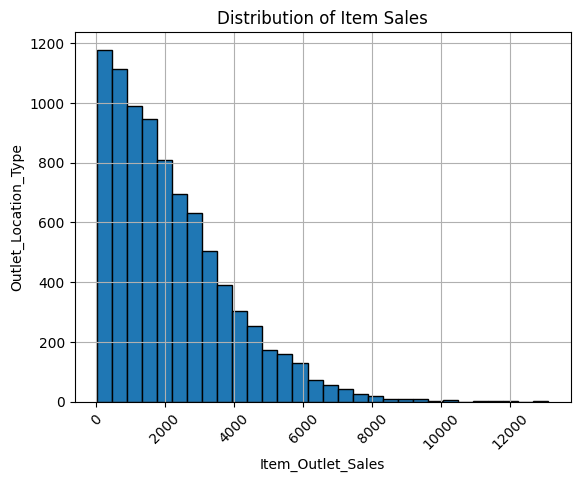

In [29]:
# This histogram shows the relationshiop of Item_Outlet_Sales and Outlet location. This can give a better understanding of which outlet produces the best sales.
ax = df['Item_Outlet_Sales'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
#ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Item Sales')
ax.set_xlabel('Item_Outlet_Sales')
ax.set_ylabel('Outlet_Location_Type')

Text(0.5, 1.0, 'Distribution of Fat Content')

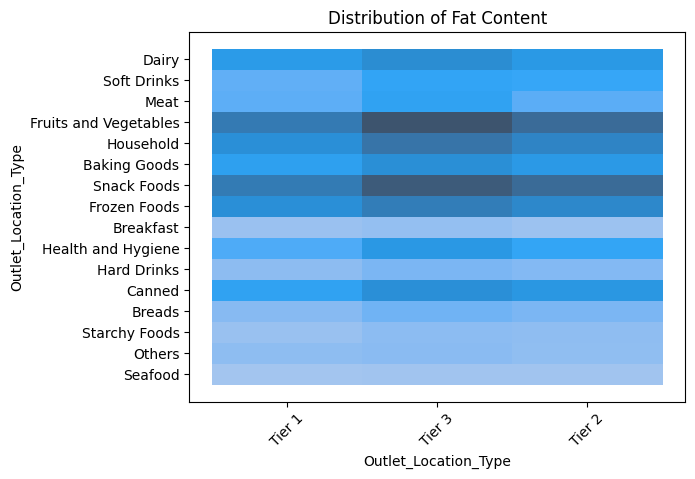

In [30]:
# This plot shows the distribution of fat content across the different outlet location type
ax = sns.histplot(data = df, y = 'Item_Type', x='Outlet_Location_Type')
ax.tick_params(axis='x', rotation = 45)
ax.set_ylabel('Outlet_Location_Type')
ax.set_title('Distribution of Fat Content')

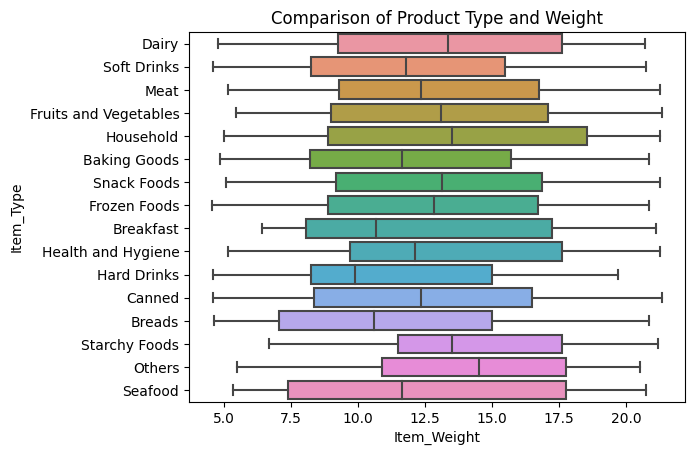

In [31]:
ax = sns.boxplot(x='Item_Weight', y='Item_Type', data=df)
ax.set_title("Comparison of Product Type and Weight");

<ipython-input-32-298a59117401>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

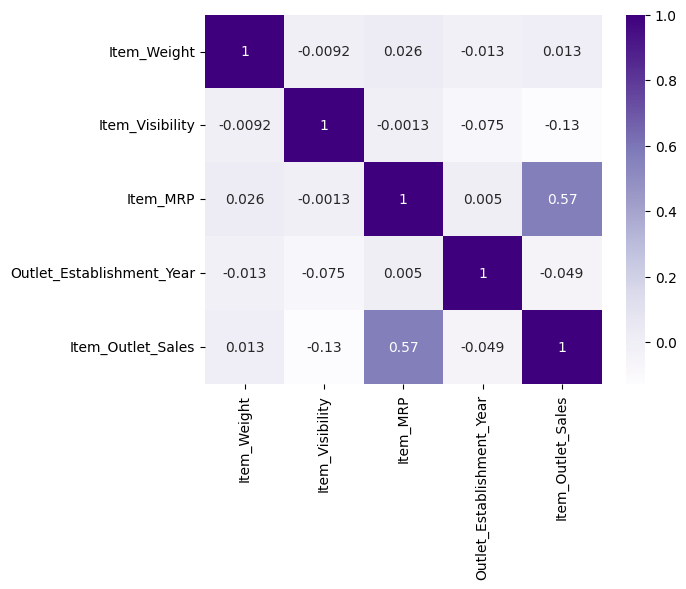

In [32]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True)

# Explanatory Visuals (Part 4)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


1. Which Product Type earns the most and least money?

In [34]:
means = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
means

Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Dairy                    2232.542597
Canned                   2225.194904
Breads                   2204.132226
Meat                     2158.977911
Hard Drinks              2139.221622
Frozen Foods             2132.867744
Breakfast                2111.808651
Health and Hygiene       2010.000265
Soft Drinks              2006.511735
Baking Goods             1952.971207
Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64

<ipython-input-35-15628f5ce09c>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df,x='Item_Type', y = 'Item_Outlet_Sales', order = means.index, ci = None)


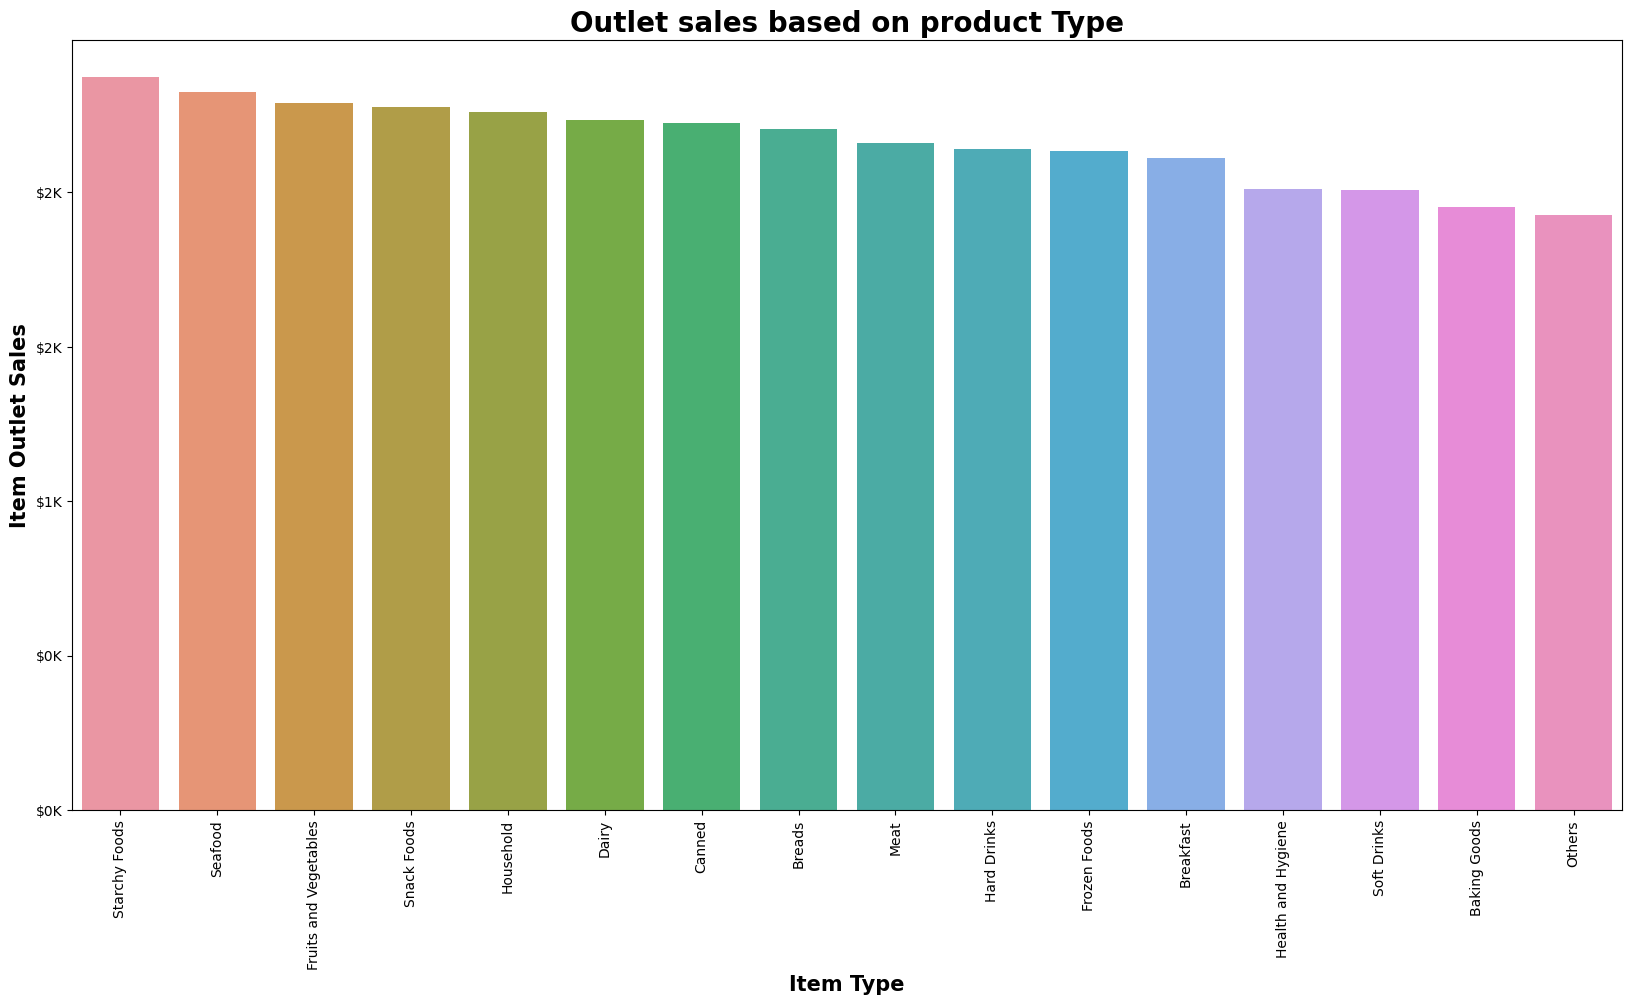

In [35]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Item_Type', y = 'Item_Outlet_Sales', order = means.index, ci = None)
plt.xticks(rotation = 90)
ax.set_title('Outlet sales based on product Type', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Item Type', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item Outlet Sales', fontsize = 15, fontweight = 'bold');

def hundred_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'${x*1e-3:,.0f}K'

price_fmt_100k = FuncFormatter(hundred_k)

ax.yaxis.set_major_formatter(price_fmt_100k)

**The top five highest product sales are as follows:**

- Starchy Foods:$2374.33 

- Seafood: $2326.07

- Fruits and Vegetables: $2289.00

- Snack Foods: $2277.32

- Household: $2258.78


**The bottom five least product sales are as follows:**




- Frozen Foods:             $2132.87    

- Breakfast:             $2111.80 

- Health and Hygiene:       $2010.00 

- Soft Drinks:              $2006.51 

- Baking Goods:  $1952.97 

**Which Outlet Location had the least and most amount of Item sales**

In [36]:
means2 = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
means2

Outlet_Location_Type
Tier 2    2323.990559
Tier 3    2279.627651
Tier 1    1876.909159
Name: Item_Outlet_Sales, dtype: float64

The top and bottom earning locations for item sales are as follows.
The Top earning location for Items sales
- Tier 2

The bottom earning location for item sales.
- Tier 1

<ipython-input-37-a111e082dfc4>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df,x='Outlet_Location_Type', y = 'Item_Outlet_Sales', order = means2.index, ci = None)


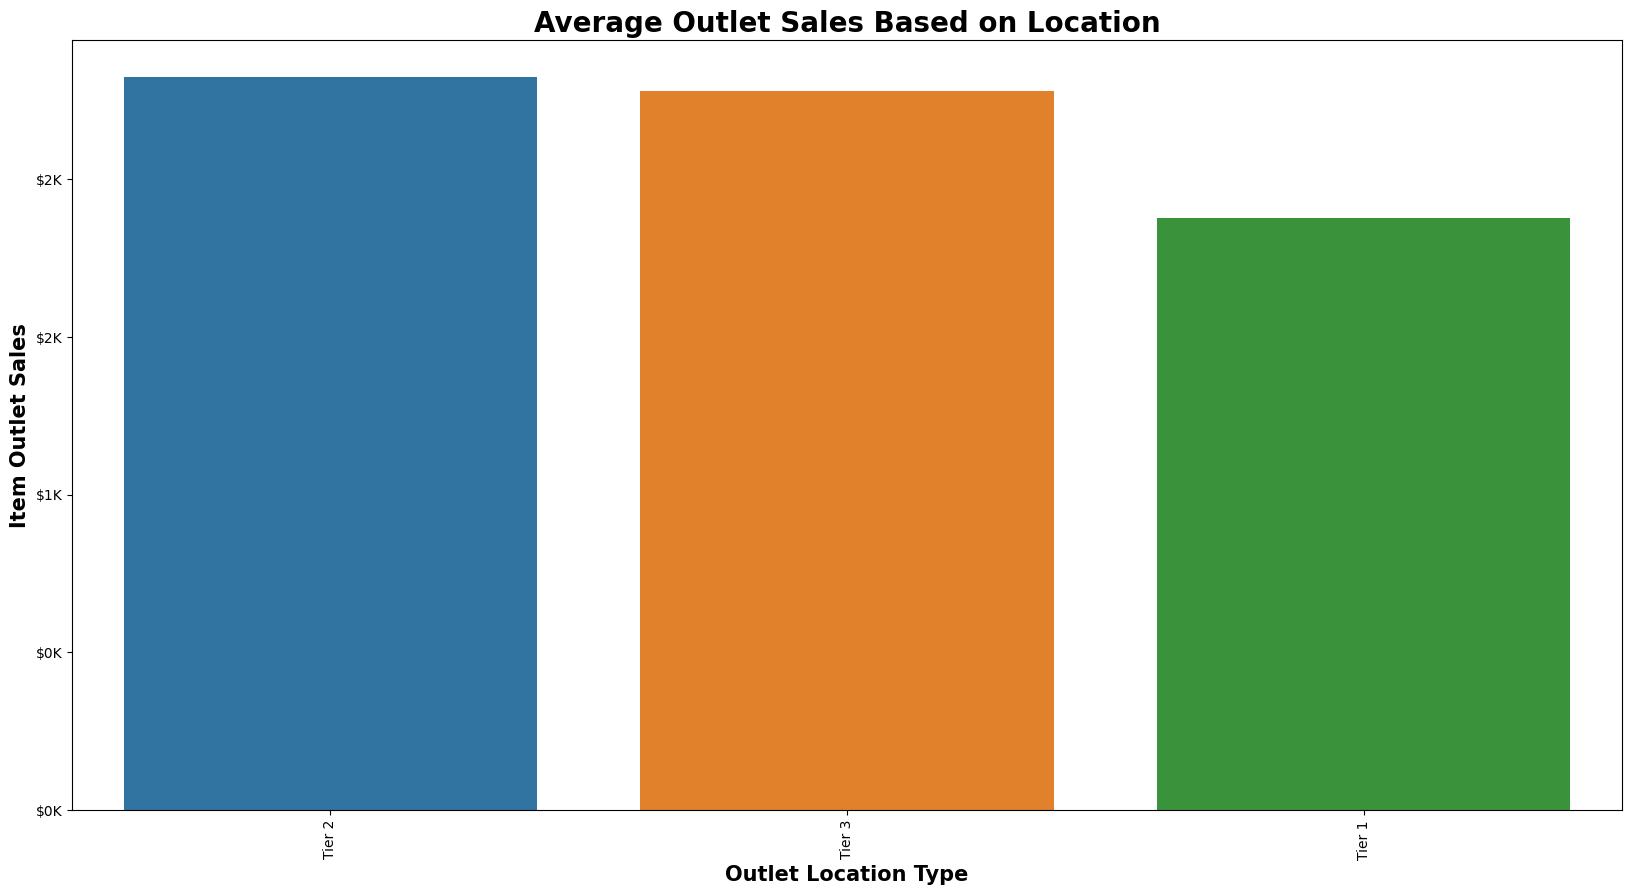

In [37]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Outlet_Location_Type', y = 'Item_Outlet_Sales', order = means2.index, ci = None)
plt.xticks(rotation = 90)
ax.set_title('Average Outlet Sales Based on Location', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Outlet Location Type', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item Outlet Sales', fontsize = 15, fontweight = 'bold');

def hundred_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'${x*1e-3:,.0f}K'

price_fmt_100k = FuncFormatter(hundred_k)

ax.yaxis.set_major_formatter(price_fmt_100k)

# Machine Learning (Part 5)

In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer      

In [39]:
#Reloading in the Data.
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [40]:
# Checking for Duplicates
df2.duplicated().sum()

0

In [41]:
# Checking missing values and info
print(df2.info(), '\n')
print(df2.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None 

Item_Identifier                 0
Item

In [42]:
for column in df2.select_dtypes(include = 'object'):
  print(f"{column} value counts: \n{df2[column].value_counts()}\n")

Item_Identifier value counts: 
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content value counts: 
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type value counts: 
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier value counts: 
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    9

In [43]:
# fix Item_Fat_Content inconsistencies
df2.replace({'LF': 'Low Fat', 
            'reg': 'Regular', 
            'low fat': 'Low Fat'},
           inplace = True)

In [44]:
# check Item_Fat_Content to see fix
df2['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

 Explore Categorical, Numerical or Ordinal data

In [45]:
# explore object data
df2.describe(include = 'object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,2,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5517,1232,935,2793,3350,5577


In [46]:
# explore numeric data
df2.describe(include = 'number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


 Categorical Columns:
( Item_Identifier", "Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Location_Type", "Outlet_Type")

 Numerical Columns 
("Item_Weight", "Item_Visibility", "Item_MRP")

 Ordinal Columns
("Outlet_size")


In [47]:
df2['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [48]:
# Item_Identifier contains 1559 uniques values 
#These values will not predict how much will be sold. Therefore this column will be dropped
df2.drop(columns = 'Item_Identifier', inplace = True)

In [49]:
# Display the number of duplicate rows in the dataset
print(f'There are {df2.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


#Divide features and target and perform a train/test split

In [50]:
# features (X) = 
X= df2[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']] 
# target (y) =  "Item_Outlet_Sales"
target = 'Item_Outlet_Sales'
y = df2[target]


In [51]:
# Perfoming a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [52]:
y.dtype

dtype('float64')

In [53]:
y.value_counts(dropna = False)

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [54]:
# inspect value counts for each column in X_train
for column in X_train:
  print(f"{column}: {df2[column].dtype}\n{X_train[column].value_counts(dropna = False)} \n\n")

Item_Weight: float64
NaN       1107
12.150      62
17.600      60
13.650      57
11.800      55
          ... 
4.590        1
8.485        1
6.170        1
7.685        1
5.155        1
Name: Item_Weight, Length: 413, dtype: int64 


Item_Fat_Content: object
Low Fat    4129
Regular    2263
Name: Item_Fat_Content, dtype: int64 


Item_Visibility: float64
0.000000    400
0.076975      2
0.059847      2
0.014048      2
0.061164      2
           ... 
0.062276      1
0.021337      1
0.108005      1
0.180821      1
0.016993      1
Name: Item_Visibility, Length: 5927, dtype: int64 


Item_Type: object
Fruits and Vegetables    948
Snack Foods              906
Household                695
Frozen Foods             632
Dairy                    507
Canned                   481
Baking Goods             478
Health and Hygiene       390
Soft Drinks              331
Meat                     302
Breads                   175
Hard Drinks              169
Others                   130
Starchy Foods       

## Create a preprocessing object to prepare the dataset for Machine Learning

In [55]:
#instantiate the selectors to for numeric and categorical data types
cat_selector = make_column_selector(dtype_include='object')
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [56]:
num_selector = make_column_selector(dtype_include='number')
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [57]:
# make imputers (will use 'most_frequent' for categorical data, 'mean' for numeric data)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
freq_imputer = SimpleImputer(strategy = 'most_frequent')
mean_imputer = SimpleImputer(strategy = 'mean')

In [58]:
# make scaler for numeric columns (numeric and ordinal data needs to be scaled)
scaler = StandardScaler()

In [59]:
# make scaler for categorical columns
ohe = OneHotEncoder(handle_unknown = 'ignore',
                    sparse_output = False)

In [60]:
# make numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [61]:
# make categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [62]:
# make tuples for column transformer
numeric_tuple = (numeric_pipe, num_selector)
categorical_tuple = (categorical_pipe, cat_selector)

In [63]:
# create preprocessor object (column transformer)
preprocessor = make_column_transformer(numeric_tuple, categorical_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8d00d7a00>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8d00cca00>)])

In [64]:
type(preprocessor)

sklearn.compose._column_transformer.ColumnTransformer

In [65]:
#Fit to X train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8d00d7a00>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8d00cca00>)])

In [69]:
# transform both training and test data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Untuned Linear Regression Model

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV


In [71]:
## Make and fit model
linreg_pipe = make_pipeline(preprocessor,LinearRegression())
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8d00d7a00>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8d00cca00>)])),
                ('linearregression', LinearRegression())])

In [72]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in test data')
print()
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print()
print('Shape of data is', X_train_processed.shape)
print(X_train_processed)

0 missing values in training data
0 missing values in test data

All data in X_train_processed are float64
All data in X_test_processed are float64

Shape of data is (6392, 42)
[[ 0.81724868 -0.71277507  1.82810922 ...  0.          1.
   0.        ]
 [ 0.5563395  -1.29105225  0.60336888 ...  0.          1.
   0.        ]
 [-0.13151196  1.81331864  0.24454056 ...  1.          0.
   0.        ]
 ...
 [ 1.11373638 -0.92052713  1.52302674 ...  1.          0.
   0.        ]
 [ 1.76600931 -0.2277552  -0.38377708 ...  1.          0.
   0.        ]
 [ 0.81724868 -0.95867683 -0.73836105 ...  1.          0.
   0.        ]]


In [73]:
# create model predictions on training and testing data
linreg_train = linreg_pipe.predict(X_train)
linreg_test = linreg_pipe.predict(X_test)

## Function to Evaluate Model

In [74]:
def evaluate_model(y_true, y_pred, split='training'):
    
  r2 = r2_score(y_true,y_pred)
  mae = mean_absolute_error(y_true,y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true,y_pred,squared=False)

  
  print(f'Results for {split} data:')
  print(f"  - R^2 = {round(r2,3)}")
  print(f"  - MAE = {round(mae,3)}")
  print(f"  - MSE = {round(mse,3)}")
  print(f"  - RMSE = {round(rmse,3)}")
  print()

## Linear Regression Model r^2

In [75]:
## Evaluate model's performance
evaluate_model(y_train, linreg_train,split='training')
evaluate_model(y_test, linreg_test,split='testing')

Results for training data:
  - R^2 = 0.562
  - MAE = 847.128
  - MSE = 1297558.183
  - RMSE = 1139.104

Results for testing data:
  - R^2 = 0.567
  - MAE = 804.118
  - MSE = 1194347.614
  - RMSE = 1092.862



1. This model performs well on both the training and test set
2. This model can account for about 57% of the variation in the test data 

## Linear Regression Model rmse

In [ ]:
# ## Make and fit model
# linreg_pipe = make_pipeline(preprocessor,LinearRegression(random_state = 42))
# linreg_pipe.fit(X_train, y_train)

# ## Get predictions for training and test data
# linreg_train = linreg_pipe.predict(X_train)
# linreg_test = linreg_pipe.predict(X_test)

In [81]:
## Evaluate model's performance
evaluate_model(y_train, linreg_train,split='training')
evaluate_model(y_test, linreg_test,split='testing')

Results for training data:
  - R^2 = 0.562
  - MAE = 847.128
  - MSE = 1297558.183
  - RMSE = 1139.104

Results for testing data:
  - R^2 = 0.567
  - MAE = 804.118
  - MSE = 1194347.614
  - RMSE = 1092.862



In [82]:
# create dataframe to save model evaluation scores in
reg_metrics_df = pd.DataFrame(columns = ['Train MAE', 'Test MAE', 'Train MSE', 'Test MSE', 'Train RMSE', 'Test RMSE', 'Train R2', 'Test R2'])
reg_metrics_df

,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2


In [83]:
# save model's regression metrics scores
def regression_metrics(model_pipe, X_train, X_test, y_train, y_test, name):
  
  y_train_pred = model_pipe.predict(X_train)
  reg_metrics_df.at[name, 'Train MAE'] = mean_absolute_error(y_train, y_train_pred)
  reg_metrics_df.at[name, 'Train MSE'] = mean_squared_error(y_train, y_train_pred)
  reg_metrics_df.at[name, 'Train RMSE'] = np.sqrt(mean_squared_error(y_train, y_train_pred))
  reg_metrics_df.at[name, 'Train R2'] = r2_score(y_train, y_train_pred)
  
  y_test_pred = model_pipe.predict(X_test)
  reg_metrics_df.at[name, 'Test MAE'] = mean_absolute_error(y_test, y_test_pred)
  reg_metrics_df.at[name, 'Test MSE'] = mean_squared_error(y_test, y_test_pred)
  reg_metrics_df.at[name, 'Test RMSE'] = np.sqrt(mean_squared_error(y_test, y_test_pred))
  reg_metrics_df.at[name, 'Test R2'] = r2_score(y_test, y_test_pred)


In [84]:
# check metrics for default linear regression
regression_metrics(linreg_pipe, X_train, X_test, y_train, y_test, "Default Linear Regressor")
reg_metrics_df

,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2
Default Linear Regressor,847.128021,804.11809,1297558.183367,1194347.614292,1139.104114,1092.86212,0.561555,0.567105


# Tuned Linear Regression

In [85]:
# instantiate linear regression model for tuning
lin_reg_tuned = LinearRegression()

In [87]:
# create pipeline for linear regression default model
lin_reg_tuned_pipe = make_pipeline(preprocessor, lin_reg_tuned)

In [88]:
# check
lin_reg_tuned_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8d00d7a00>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8d00cca00>)])),
                ('linearregression', LinearRegression())])

In [89]:
# inspect parameters available for tuning
lin_reg_tuned_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8d00d7a00>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                       

In [90]:
# make parameter dictionary for gridsearchcv
lin_reg_params = {'linearregression__fit_intercept': [True, False],
                  'linearregression__positive': [True, False]}

In [91]:
# instantiate gridsearchcv with MAE as scoring metric
lin_reg_grid_search = GridSearchCV(lin_reg_tuned_pipe, lin_reg_params, scoring = 'neg_mean_absolute_error')

In [92]:
# fit gridsearchcv
lin_reg_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8d00d7a00>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='mos...uent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8d00cca00>)])),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__positive': [True, False]},
             scoring='neg_mean_absolute_error')

In [93]:
# look at best parameters
lin_reg_grid_search.best_params_

{'linearregression__fit_intercept': False, 'linearregression__positive': True}

In [94]:
# instantiate best model
lin_reg_tuned_pipe = lin_reg_grid_search.best_estimator_

In [95]:
# refit model on training data
lin_reg_tuned_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8c9ef3d30>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8c9ef3820>)])),
                ('linearregression',
                 LinearRegression(fit_intercept=False, positive=True))])

In [96]:
# check metrics for tuned linear regression
regression_metrics(lin_reg_tuned_pipe, X_train, X_test, y_train, y_test, "Tuned Linear Regressor")
reg_metrics_df

,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2
Default Linear Regressor,847.128021,804.11809,1297558.183367,1194347.614292,1139.104114,1092.86212,0.561555,0.567105
Tuned Linear Regressor,847.339236,803.345895,1298045.42964,1193601.252005,1139.317967,1092.520596,0.56139,0.567375


# UnTuned Decision Tree Regressor Model
- This model shows good scores between the test and train data.
- There is no bias but alot of variance

In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [134]:
# instantiate default decision tree model
dec_tree_def = DecisionTreeRegressor(random_state = 42)

# make pipeline with preprocessor
dec_tree_def_pipe = make_pipeline(preprocessor, dec_tree_def)

# fit model on training data only
dec_tree_def_pipe.fit(X_train, y_train)

# print('Training Scores for High Variance Decision Tree')
evaluate_model(y_train, dec_tree_def_pipe.predict(X_train), split = 'training')

print('\n')

# print('Testing Scores for High Variance Decision Tree')
evaluate_model(y_test, dec_tree_def_pipe.predict(X_test), split = 'testing')

Results for training data:
  - R^2 = 1.0
  - MAE = 0.0
  - MSE = 0.0
  - RMSE = 0.0



Results for testing data:
  - R^2 = 0.184
  - MAE = 1044.998
  - MSE = 2251075.165
  - RMSE = 1500.358



In [118]:
# get metrics
regression_metrics(dec_tree_def_pipe, X_train, X_test, y_train, y_test, 'Default Decision Tree')
reg_metrics_df

,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2
Default Linear Regressor,847.128021,804.11809,1297558.183367,1194347.614292,1139.104114,1092.86212,0.561555,0.567105
Tuned Linear Regressor,847.339236,803.345895,1298045.42964,1193601.252005,1139.317967,1092.520596,0.56139,0.567375
Default Decision Tree,0.0,1044.998251,0.0,2251075.164892,0.0,1500.358345,1.0,0.184091


# Tuned Decision Tree Model
- This model is overfit

In [102]:
# instantiate decision tree model to tune
dec_tree_tuned = DecisionTreeRegressor(random_state = 42)

In [103]:
# make pipeline with preprocessor
dec_tree_tuned_pipe = make_pipeline(preprocessor, dec_tree_tuned)

In [104]:
# check
dec_tree_tuned_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8d00d7a00>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8d00cca00>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [105]:
# see parameters available for tuning
dec_tree_tuned_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8d00d7a00>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                       

In [106]:
# to tune hyperparameter 'max_depth', look at depth of default tree
dec_tree_def.get_depth()

40

In [122]:
# make parameter dictionary for tuning
dec_tree_params = {'decisiontreeregressor__max_depth': list(range(20, 42)),
                   'decisiontreeregressor__min_samples_split': list(range(2, 25, 2)),
                   'decisiontreeregressor__min_samples_leaf': list(range(10, 40)),
                   'decisiontreeregressor__max_features': [None],
                   'decisiontreeregressor__criterion': ['squared_error']}

In [123]:
# instantiate gridsearchcv with MAE as scoring metric
dec_tree_grid_search = GridSearchCV(dec_tree_tuned_pipe, dec_tree_params, scoring = 'neg_mean_absolute_error')

In [ ]:
# fit gridsearchcv
dec_tree_grid_search.fit(X_train, y_train)

In [ ]:
# look at best parameters
dec_tree_grid_search.best_params_

In [ ]:
# instantiate best model
dec_tree_tuned_pipe = dec_tree_grid_search.best_estimator_

In [ ]:
# refit model on training data
dec_tree_tuned_pipe.fit(X_train, y_train)

In [ ]:
# check metrics for tuned decision tree model
regression_metrics(dec_tree_tuned_pipe, X_train, X_test, y_train, y_test, "Tuned Decision Tree")
reg_metrics_df

### Creating a Loop to Tune n_estimators for Random Forest Regressor Model

## Tuned (n_estimators) Random Forest Model Observations
- This model contains bias but has great performance on testing score.
- For r^2 sscore of 56% of the variance is explained


In [125]:
#create a range of max_depth values
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400]

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=n_estimators)
#loop over the values in depths
for n in n_estimators:
  #fit a new model with max_depth
  rf = RandomForestRegressor(random_state = 42, n_estimators=n)

  #put the model into a pipeline
  rf_pipe = make_pipeline(preprocessor, rf)
  
  #fit the model
  rf_pipe.fit(X_train, y_train)
  
  #create prediction arrays
  train_pred = rf_pipe.predict(X_train)
  test_pred = rf_pipe.predict(X_test)
  
  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)
  
  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

In [126]:
scores.head()

,Train,Test
50,0.935491,0.556445
100,0.93821,0.55977
150,0.939019,0.560826
200,0.939439,0.559095
250,0.939697,0.560018


In [127]:
best_estimators = scores.sort_values(by='Test', ascending=False).index[0]
best_estimators

150

In [131]:
# check metrics for untuned Random Forest Regressor model
regression_metrics(rf_pipe, X_train, X_test, y_train, y_test, "Tuned Random Forest Regressor")
reg_metrics_df

,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2
Default Linear Regressor,847.128021,804.11809,1297558.183367,1194347.614292,1139.104114,1092.86212,0.561555,0.567105
Tuned Linear Regressor,847.339236,803.345895,1298045.42964,1193601.252005,1139.317967,1092.520596,0.56139,0.567375
Default Decision Tree,0.0,1044.998251,0.0,2251075.164892,0.0,1500.358345,1.0,0.184091
UnTuned Random Forest Regressor,295.985093,765.627521,180470.326505,1211670.531067,424.817992,1100.75907,0.939019,0.560826
Tuned Random Forest Regressor,294.054305,767.327664,176981.359927,1216165.722296,420.691526,1102.79904,0.940198,0.559197


# Untuned Random Forest Model
- The results improved as far as the regression metrics and the model's performance.
-This model still has some bias. 
- For the R^2 score 56.0% of the variance is explained.
- For the MAE the testing data is off by about $766.07

In [128]:
best_rf = RandomForestRegressor(random_state = 42, n_estimators=best_estimators)

best_rf_pipe = make_pipeline(preprocessor, best_rf)

best_rf_pipe.fit(X_train, y_train)

print('Training Scores for High Variance Decision Tree')
evaluate_model(y_train, best_rf_pipe.predict(X_train), split = 'training')

print('\n')

print('Testing Scores for High Variance Decision Tree')
evaluate_model(y_test, best_rf_pipe.predict(X_test), split = 'testing')

Training Scores for High Variance Decision Tree
Results for training data:
  - R^2 = 0.939
  - MAE = 295.985
  - MSE = 180470.327
  - RMSE = 424.818



Testing Scores for High Variance Decision Tree
Results for testing data:
  - R^2 = 0.561
  - MAE = 765.628
  - MSE = 1211670.531
  - RMSE = 1100.759



In [132]:
# check metrics for untuned Random Forest Regressor model
regression_metrics(best_rf_pipe, X_train, X_test, y_train, y_test, "UnTuned Random Forest Regressor")
reg_metrics_df

,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2
Default Linear Regressor,847.128021,804.11809,1297558.183367,1194347.614292,1139.104114,1092.86212,0.561555,0.567105
Tuned Linear Regressor,847.339236,803.345895,1298045.42964,1193601.252005,1139.317967,1092.520596,0.56139,0.567375
Default Decision Tree,0.0,1044.998251,0.0,2251075.164892,0.0,1500.358345,1.0,0.184091
UnTuned Random Forest Regressor,295.985093,765.627521,180470.326505,1211670.531067,424.817992,1100.75907,0.939019,0.560826
Tuned Random Forest Regressor,294.054305,767.327664,176981.359927,1216165.722296,420.691526,1102.79904,0.940198,0.559197


# Model Decision
- I would recommend the UnTuned Random Forest Regressor Model 
- It outperforrmed on RMSE score (lower the better) and R2 (higher the better)